In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import PIL.Image
from pylab import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import json
from pathlib import Path as Data_Path
import os
from os import listdir
from os.path import isfile, join
from itertools import combinations

In [88]:
def generate_playlist_df(playlist_id, playlist_json):
    
    cols = ['playlist_id', 'plst_name', 'collaborative', 'pid', 'modified_at', 'num_tracks', 'num_albums', 'num_followers',
           'track_id', 'pos', 'artist_name', 'artist_uri', 'track_name', 'album_uri', 'duration_ms', 'album_name']

    data_col = []
    plst_name = playlist_json['name']
    collaborative = playlist_json['collaborative']
    pid = playlist_json['pid']
    modified_at = playlist_json['modified_at']
    num_tracks = playlist_json['num_tracks']
    num_albums = playlist_json['num_albums']
    num_followers = playlist_json['num_followers']
    
    
    
    for track in playlist_json['tracks']:
        track_id = ''.join(track['track_uri'].split(':')[2:])
        pos = track['pos']
        artist_name = track['artist_name']
        artist_uri = track['artist_uri']
        track_name = track['track_name']
        album_uri = track['album_uri']
        duration_ms = track['duration_ms']
        album_name = track['album_name']
        data_col.append([f'plst_{playlist_id}', plst_name, collaborative, pid, modified_at, num_tracks, num_albums, num_followers, track_id, pos, artist_name, artist_uri, track_name, album_uri, duration_ms, album_name])
    

    
    plst_df = pd.DataFrame(data=data_col, columns=cols)
    return plst_df

def generate_file_df(start_index, file_json):
    dfs = []
    for i, plst_json in enumerate(file_json['playlists']):
        dfs.append(generate_playlist_df(start_index + i, plst_json))
        
    df_sum = pd.concat(dfs)
    return df_sum

def generate_spotify_df(data_path, start_index=None, end_index=None):
    assert (start_index is None and end_index is None) or \
        (start_index is not None and end_index is not None), 'Set both or none indices.'
    json_names = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '.json' in f]
    
    num_playlists = start_index if start_index is not None else 0
    section = json_names if start_index is None else json_names[start_index:end_index]
    dfs = []
    
    for file_name in tqdm(section, desc='Files processed: ', unit='files', total=len(section)):
        with open(join(data_path, file_name)) as json_file:
            data = json.load(json_file)
            
        dfs.append(generate_file_df(num_playlists, data))
        num_playlists += len(data['playlists'])
        
    df_total = pd.concat(dfs)
    return df_total

data_path = '/Users/rituraj0480/Downloads/data/'
df = generate_spotify_df(data_path, 0, len(os.listdir()))

Files processed: 100%|███████████████████████| 12/12 [00:05<00:00,  2.18files/s]


In [3]:
df.head()

,playlist_id,plst_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,track_id,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,6QHYEZlm9wyfXfEM1vSu1P,0,Bob Dylan,spotify:artist:74ASZWbe4lXaubB36ztrGX,Boots of Spanish Leather,spotify:album:7DZeLXvr9eTVpyI1OlqtcS,277106,The Times They Are A-Changin'
1,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,3RkQ3UwOyPqpIiIvGVewuU,1,Bob Dylan,spotify:artist:74ASZWbe4lXaubB36ztrGX,Mr. Tambourine Man,spotify:album:1lPoRKSgZHQAYXxzBsOQ7v,330533,Bringing It All Back Home
2,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,0ju1jP0cSPJ8tmojYBEI89,2,Loggins & Messina,spotify:artist:7emRV8AluG3d4e5T0DZiK9,Danny's Song,spotify:album:5BWgJaesMjpJWCTU9sgUPf,254653,The Best: Loggins & Messina Sittin' In Again
3,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,7ny2ATvjtKszCpLpfsGnVQ,3,Bob Dylan,spotify:artist:74ASZWbe4lXaubB36ztrGX,A Hard Rain's A-Gonna Fall,spotify:album:0o1uFxZ1VTviqvNaYkTJek,412200,The Freewheelin' Bob Dylan
4,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,18GiV1BaXzPVYpp9rmOg0E,4,Bob Dylan,spotify:artist:74ASZWbe4lXaubB36ztrGX,Blowin' In the Wind,spotify:album:0o1uFxZ1VTviqvNaYkTJek,165426,The Freewheelin' Bob Dylan


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799958 entries, 0 to 51
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   playlist_id    799958 non-null  object
 1   plst_name      799958 non-null  object
 2   collaborative  799958 non-null  object
 3   pid            799958 non-null  int64 
 4   modified_at    799958 non-null  int64 
 5   num_tracks     799958 non-null  int64 
 6   num_albums     799958 non-null  int64 
 7   num_followers  799958 non-null  int64 
 8   track_id       799958 non-null  object
 9   pos            799958 non-null  int64 
 10  artist_name    799958 non-null  object
 11  artist_uri     799958 non-null  object
 12  track_name     799958 non-null  object
 13  album_uri      799958 non-null  object
 14  duration_ms    799958 non-null  int64 
 15  album_name     799958 non-null  object
dtypes: int64(7), object(9)
memory usage: 103.8+ MB


# Length of Playlists

In [4]:
df_len = df.groupby('playlist_id').sum()['duration_ms'].reset_index()

/var/folders/64/x9t4nz69765crm97ctktvyz40000gn/T/ipykernel_1942/2450374462.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_len = df.groupby('playlist_id').sum()['duration_ms'].reset_index()


In [5]:
# convert milliseconds to minutes (rounded)

df_len['duration_ms'] = round((df_len['duration_ms'] / 1000)/60, 0).astype(int)

# change column name to minutes

df_len.rename(columns = {'duration_ms':'duration_min'}, inplace = True)


/var/folders/64/x9t4nz69765crm97ctktvyz40000gn/T/ipykernel_1942/2806399470.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_len['duration_min'], shade = True, color = 'limegreen', legend = False )


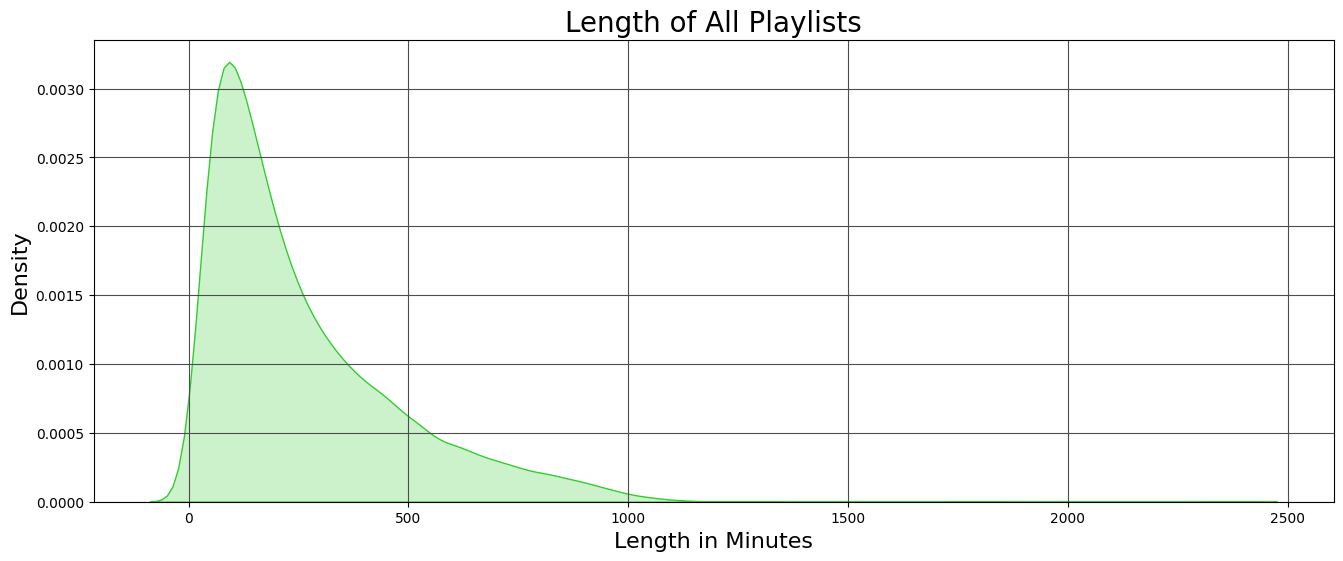

In [6]:
plt.figure(figsize=(16,6))

sns.kdeplot(df_len['duration_min'], shade = True, color = 'limegreen', legend = False )

plt.title('Length of All Playlists', fontsize = 20)
plt.xlabel('Length in Minutes', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.grid(color='#4d4d4d')
plt.show()

# Top 5 most popular artists

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Kanye West'),
  Text(2, 0, 'Kendrick Lamar'),
  Text(3, 0, 'Rihanna'),
  Text(4, 0, 'The Weeknd')])

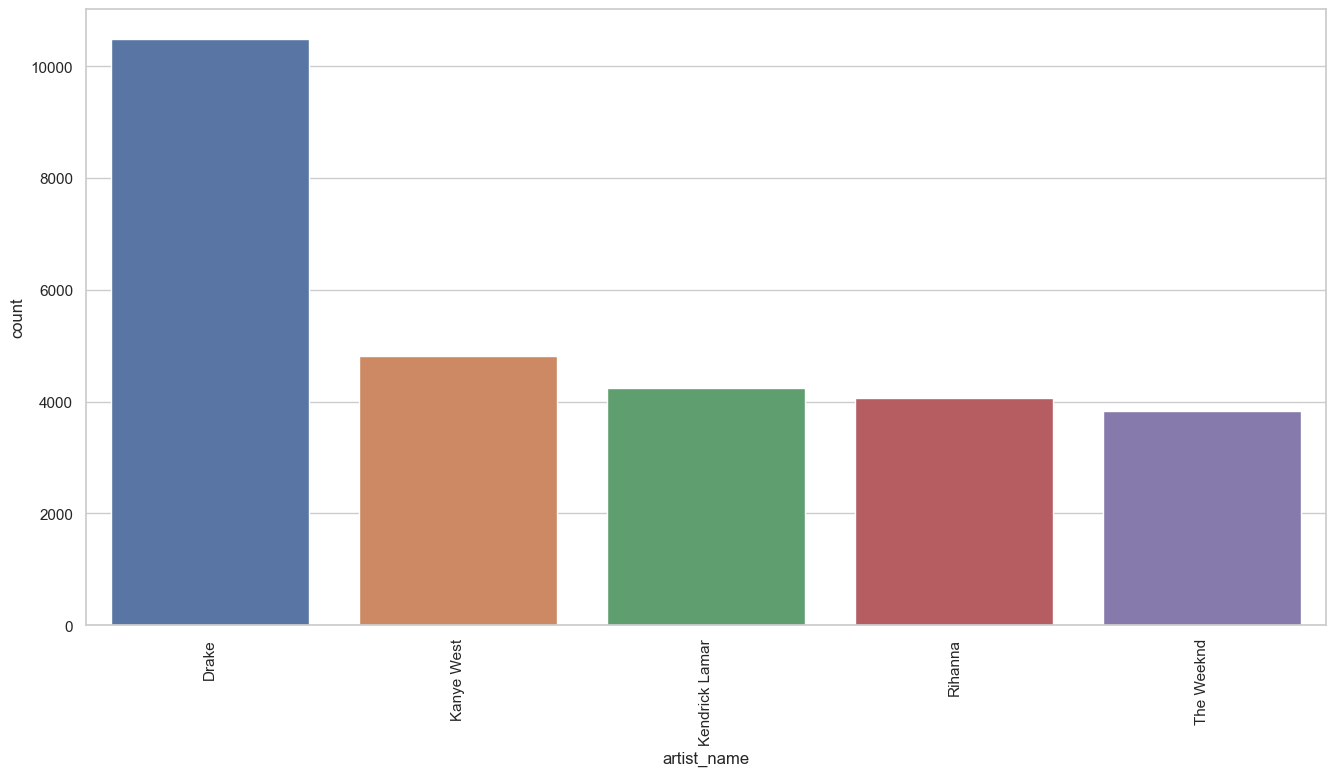

In [40]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.countplot(x=df["artist_name"], order=df.artist_name.value_counts().iloc[:5].index)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [9]:
df.groupby('artist_name').count()['playlist_id'].reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(5)

,artist_name,count
9812,Drake,10497
18075,Kanye West,4818
18423,Kendrick Lamar,4248
28352,Rihanna,4074
35360,The Weeknd,3827


# Top 10 most popular songs

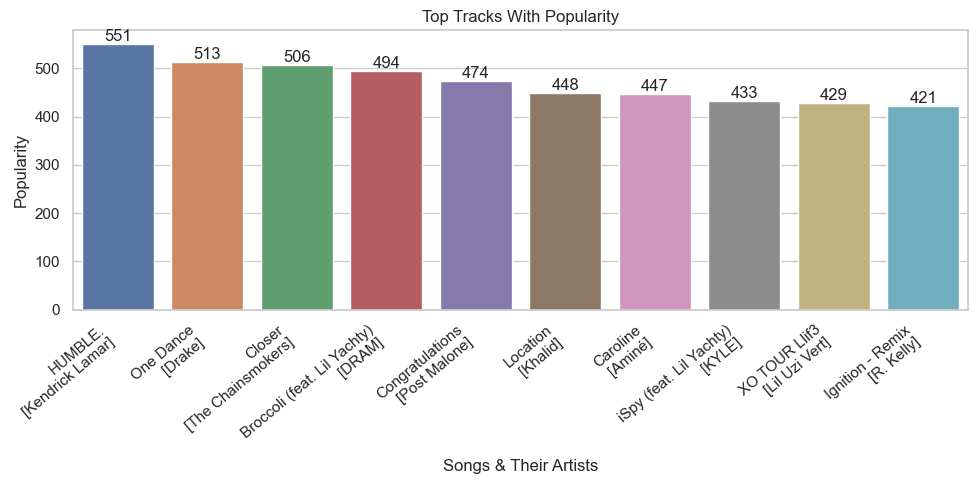

In [42]:
df_top_songs = df.groupby(['track_name','artist_name']).count()['playlist_id'].reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(10)

fig = plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_top_songs["track_name"]+'\n['+df_top_songs["artist_name"]+']', y=df_top_songs['count'], data=df_top_songs)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Top Tracks With Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs & Their Artists')
plt.tight_layout()
plt.show()

In [11]:
df.groupby(['track_name','artist_name']).count()['playlist_id'].reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(10)

,track_name,artist_name,count
63528,HUMBLE.,Kendrick Lamar,551
117117,One Dance,Drake,513
29949,Closer,The Chainsmokers,506
22503,Broccoli (feat. Lil Yachty),DRAM,494
32286,Congratulations,Post Malone,474
95277,Location,Khalid,448
26266,Caroline,Aminé,447
189190,iSpy (feat. Lil Yachty),KYLE,433
184899,XO TOUR Llif3,Lil Uzi Vert,429
79270,Ignition - Remix,R. Kelly,421


# Top 5 most followed playlists

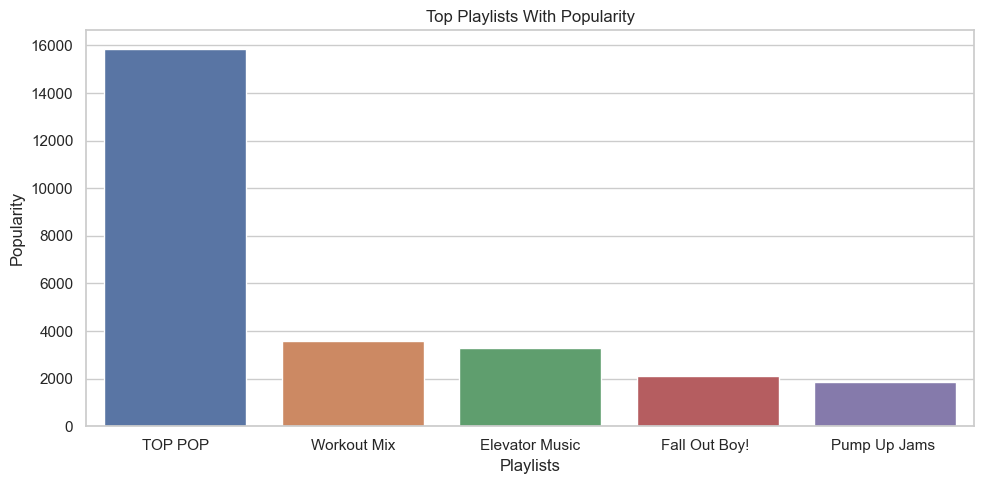

In [45]:
fig = plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
df_plr_plst = df[['plst_name', 'num_followers']].drop_duplicates().sort_values(by=['num_followers'],ascending=False).head(5)
ax = sns.barplot(x=df_plr_plst["plst_name"], y=df_plr_plst["num_followers"])
ax.set_title('Top Playlists With Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Playlists')
plt.tight_layout()
plt.show()

In [81]:
df[['plst_name', 'num_followers']].drop_duplicates().sort_values(by=['num_followers'],ascending=False)

,plst_name,num_followers
0,TOP POP,15842
0,Workout Mix,3596
0,Elevator Music,3266
0,Fall Out Boy!,2088
0,Pump Up Jams,1858
...,...,...
0,SORRY NOT SORRY,1
0,Nick Drake,1
0,hello.,1
0,That New New,1


# Most frequent words that people listen

In [13]:
import lyricsgenius
import time


genius = lyricsgenius.Genius('KkXx-pjsHseFE8LqHtzZG9cMHg_IzsLN7Ldqd48nsokZalOL2dUXYuZPVH0BIkM2')
def get_lyrics(df_row):
    song = df_row['track_name']
    while True:
        try:
            g_song = genius.search_song(song, df_row['artist_name'])
            break
        except:
            pass
    return g_song.lyrics

In [14]:
df_top_tracks = df.groupby(['track_name','artist_name']).count()['playlist_id'].reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(10)

In [15]:
df_top_tracks['lyrics'] = df_top_tracks.apply(get_lyrics, axis=1)

Searching for "HUMBLE." by Kendrick Lamar...
Done.
Searching for "One Dance" by Drake...
Done.
Searching for "Closer" by The Chainsmokers...
Done.
Searching for "Broccoli (feat. Lil Yachty)" by DRAM...
Done.
Searching for "Congratulations" by Post Malone...
Done.
Searching for "Location" by Khalid...
Done.
Searching for "Caroline" by Aminé...
Done.
Searching for "iSpy (feat. Lil Yachty)" by KYLE...
Done.
Searching for "XO TOUR Llif3" by Lil Uzi Vert...
Done.
Searching for "Ignition - Remix" by R. Kelly...
Done.


In [31]:
music_mask = np.array(PIL.Image.open("music.png"))

In [32]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [33]:
transformed_music_mask = np.ndarray((music_mask.shape[0],music_mask.shape[1]), np.int32)

for i in range(len(music_mask)):
    transformed_music_mask[i] = list(map(transform_format, music_mask[i]))

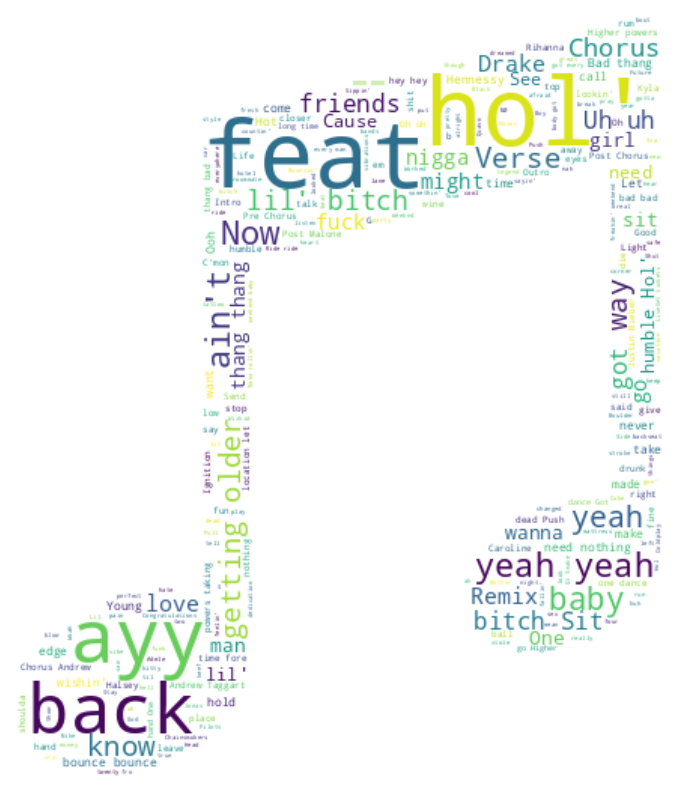

In [39]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_music_mask,
               stopwords=stopwords)
text = " ".join(ly.split('Lyrics')[1] for ly in df_top_tracks.lyrics)

wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
df2 = pd.read_csv('/Users/rituraj0480/Downloads/dataset.csv')

In [73]:
df2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [74]:
df2.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [75]:
df2 = df2[['track_id', 'popularity', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']]

In [79]:
df_comb = df.merge(df2, on='track_id', how='left')

In [80]:
df_comb.head()

,playlist_id,plst_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,track_id,pos,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,6QHYEZlm9wyfXfEM1vSu1P,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,3RkQ3UwOyPqpIiIvGVewuU,1,...,-14.545,1.0,0.0676,0.794,0.0,0.379,0.584,177.515,4.0,country
2,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,3RkQ3UwOyPqpIiIvGVewuU,1,...,-14.545,1.0,0.0676,0.794,0.0,0.379,0.584,177.515,4.0,folk
3,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,3RkQ3UwOyPqpIiIvGVewuU,1,...,-14.545,1.0,0.0676,0.794,0.0,0.379,0.584,177.515,4.0,singer-songwriter
4,plst_0,Bob Dylan,false,549000,1454803200,75,65,1,3RkQ3UwOyPqpIiIvGVewuU,1,...,-14.545,1.0,0.0676,0.794,0.0,0.379,0.584,177.515,4.0,songwriter


# Observations

1. There are 12000 unique playlists with total of 39315 artists and 193090 unique tracks.
2. "HUMBLE" by Kendrick Lamar is the most added song in Playlists, followed by "One Dance", "Closer, "Broccoli (feat. Lil Yachty)", and "Congratulations".
3. Artist with the largest number of songs added to playlists is Drake.
4. The most followed playlist is "TOP POP" having 15842 followers.
5. The playlists have an average of 261 minutes of listening time.

h

In [89]:
df['artist_name'].nunique()

39315

In [90]:
df['track_id'].nunique()

193090

In [91]:
df['playlist_id'].nunique()

12000

In [95]:
df_len.mean()

/var/folders/64/x9t4nz69765crm97ctktvyz40000gn/T/ipykernel_1942/3696737715.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_len.mean()


duration_min    260.994083
dtype: float64